# 개요

Dacon의 대회 https://dacon.io/competitions/open/235610/data 에 대한 풀이

# 데이터

## 다운로드

In [1]:
!wget https://github.com/dhrim/cau_2021/raw/master/material/deep_learning/data/wine.csv

--2021-09-16 05:09:26--  https://github.com/dhrim/cau_2021/raw/master/material/deep_learning/data/wine.csv
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/cau_2021/master/material/deep_learning/data/wine.csv [following]
--2021-09-16 05:09:27--  https://raw.githubusercontent.com/dhrim/cau_2021/master/material/deep_learning/data/wine.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 418942 (409K) [text/plain]
Saving to: ‘wine.csv’

wine.csv            100%[===================>] 409.12K  --.-KB/s    in 0.04s   

2021-09-16 05:09:27 (9.12 MB/s) - ‘wine.csv’ saved [418942/418942]



## 데이터 로딩

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('wine.csv')
df.head()

,2index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   2index                5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


## 코드성 데이터 인코딩

type 컬럼이 'white', 'red' 문자열로 되어 있다.

type 컬럼의 타입을 category로 변경한다.

In [78]:
df['type'] = df['type'].astype('category')
df.head()

,2index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   2index                5497 non-null   int64   
 1   quality               5497 non-null   int64   
 2   fixed acidity         5497 non-null   float64 
 3   volatile acidity      5497 non-null   float64 
 4   citric acid           5497 non-null   float64 
 5   residual sugar        5497 non-null   float64 
 6   chlorides             5497 non-null   float64 
 7   free sulfur dioxide   5497 non-null   float64 
 8   total sulfur dioxide  5497 non-null   float64 
 9   density               5497 non-null   float64 
 10  pH                    5497 non-null   float64 
 11  sulphates             5497 non-null   float64 
 12  alcohol               5497 non-null   float64 
 13  type                  5497 non-null   category
dtypes: category(1), float64(11), int64(2)
memory usage: 563.

컬럼 'type'의 카테고리 인덱스 값으로 새로운 컬럼 'type_code'을 만든다.

In [80]:
df['type_code'] = df['type'].cat.codes
df.head()

,2index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,type_code
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,1
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,1
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,1


## 카테고리 인덱스 생성

칼럼 'quality'가 출력으로 사용된다.

각 값에 대한 category index를 구하자

In [106]:
df['quality'] = df['quality'].astype('category')
df['category_index'] = df['quality'].cat.codes
df.head()

,2index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,type_code,category_index
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,1,2
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,0,2
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,1,2
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,1,3
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,1,3


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   2index                5497 non-null   int64   
 1   quality               5497 non-null   category
 2   fixed acidity         5497 non-null   float64 
 3   volatile acidity      5497 non-null   float64 
 4   citric acid           5497 non-null   float64 
 5   residual sugar        5497 non-null   float64 
 6   chlorides             5497 non-null   float64 
 7   free sulfur dioxide   5497 non-null   float64 
 8   total sulfur dioxide  5497 non-null   float64 
 9   density               5497 non-null   float64 
 10  pH                    5497 non-null   float64 
 11  sulphates             5497 non-null   float64 
 12  alcohol               5497 non-null   float64 
 13  type                  5497 non-null   category
 14  type_code             5497 non-null   int8    
 15  cate

## 입출력 분리

In [102]:
feature_column_names = df.columns.values.tolist()
print(feature_column_names)

feature_column_names.remove('2index')
feature_column_names.remove('quality')
feature_column_names.remove('type')
feature_column_names.remove('category_index')
print(feature_column_names)

['2index', 'quality', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type', 'type_code', 'category_index']
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type_code']


In [111]:
features_df = df[feature_column_names]
category_index_df = df['category_index']

In [112]:
features_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_code
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [113]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5497 non-null   float64
 1   volatile acidity      5497 non-null   float64
 2   citric acid           5497 non-null   float64
 3   residual sugar        5497 non-null   float64
 4   chlorides             5497 non-null   float64
 5   free sulfur dioxide   5497 non-null   float64
 6   total sulfur dioxide  5497 non-null   float64
 7   density               5497 non-null   float64
 8   pH                    5497 non-null   float64
 9   sulphates             5497 non-null   float64
 10  alcohol               5497 non-null   float64
 11  type_code             5497 non-null   int8   
dtypes: float64(11), int8(1)
memory usage: 477.9 KB


In [117]:
print(category_index_df.values)

[2 2 2 ... 4 2 3]


## normalization

컬럼 별로 normalization 한다.

In [118]:
features_df = (features_df - features_df.min()) / (features_df.max() - features_df.min())
features_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_code
0,0.148760,0.410000,0.036145,0.095092,0.054908,0.027778,0.179724,0.139001,0.551181,0.123596,0.318841,1.0
1,0.413223,0.353333,0.084337,0.027607,0.096506,0.031250,0.082949,0.188741,0.354331,0.207865,0.217391,0.0
2,0.338843,0.086667,0.234940,0.021472,0.079867,0.069444,0.304147,0.089647,0.244094,0.168539,0.420290,1.0
3,0.264463,0.086667,0.186747,0.082822,0.061564,0.097222,0.235023,0.130904,0.409449,0.157303,0.405797,1.0
4,0.330579,0.213333,0.156627,0.136503,0.083195,0.107639,0.396313,0.161751,0.236220,0.117978,0.420290,1.0


## numpy로 받기

In [120]:
x = features_df.values
y = category_index_df.values

print(x.shape)
print(y.shape)

print(x[:5])
print(y[:5])

(5497, 12)
(5497,)
[[0.14876033 0.41       0.03614458 0.09509202 0.05490849 0.02777778
  0.1797235  0.13900135 0.5511811  0.12359551 0.31884058 1.        ]
 [0.41322314 0.35333333 0.08433735 0.02760736 0.09650582 0.03125
  0.08294931 0.18874108 0.35433071 0.20786517 0.2173913  0.        ]
 [0.33884298 0.08666667 0.23493976 0.02147239 0.07986689 0.06944444
  0.30414747 0.08964719 0.24409449 0.16853933 0.42028986 1.        ]
 [0.26446281 0.08666667 0.18674699 0.08282209 0.06156406 0.09722222
  0.23502304 0.13090418 0.40944882 0.15730337 0.4057971  1.        ]
 [0.33057851 0.21333333 0.15662651 0.13650307 0.08319468 0.10763889
  0.39631336 0.16175053 0.23622047 0.11797753 0.42028986 1.        ]]
[2 2 2 3 3]


## train, test 데이터 분리

In [121]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True)

# 학습

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [123]:
input_shape = (x.shape[1])
unique_value, each_value_count = np.unique(y, return_counts=True)
category_count = len(each_value_count)

print(input_shape)
print(unique_value)
print(each_value_count)
print(category_count)

12
[0 1 2 3 4 5 6]
[  26  186 1788 2416  924  152    5]
7


In [124]:
model = keras.Sequential()
model.add(Input(input_shape))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(category_count, activation="softmax"))

model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 77        
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________


In [125]:
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

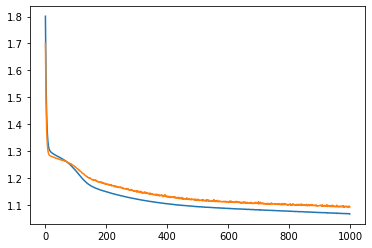

35/35 [==============================] - 0s 1ms/step - loss: 1.0594 - acc: 0.5727
loss= 1.0593734979629517
acc= 0.5727272629737854


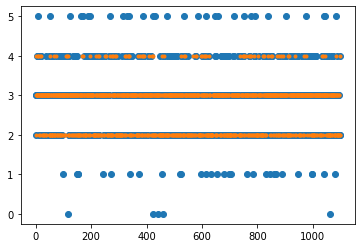

In [126]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)





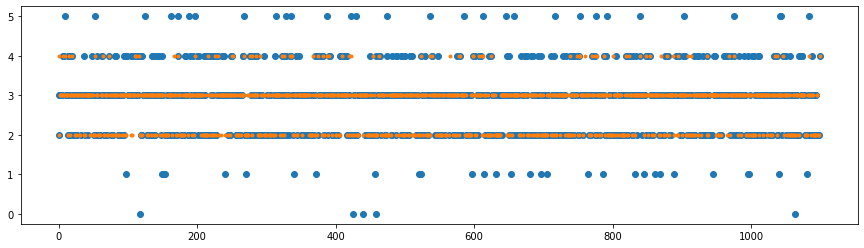

In [128]:
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.figure(figsize=(15,4))
plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()

# 재시도 - 리샘플링해서

카테고리간 비균등이 심하다.

최고 퀄리티(카테고리 인덱스 5, 6)가 적고, 최저 퀄리티(카테고리 인덱스 0, 1)이 적다.

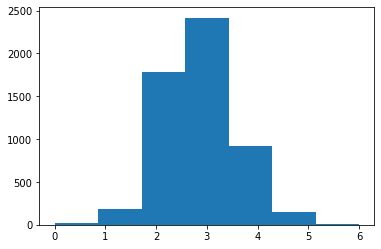

In [159]:
plt.hist(y, bins=7)
plt.show()

In [160]:
unique_value, each_value_count = np.unique(y, return_counts=True)
print(each_value_count)

[  26  186 1788 2416  924  152    5]


## 샘플링

카테고리별 데이터 갯수 1500가 되도록 다운샘플링, 업샘플링 한다.

업샘플링할 경우 최대 5%의로 노이즈를 추가한다.

In [161]:
PER_CATEGORY_SAMPLE_COUNT = 200

all_resampled_index = []
for i in range(category_count):
  category_index = np.where(y==i)[0]
  sampled_index = np.random.choice(category_index, size=PER_CATEGORY_SAMPLE_COUNT)
  all_resampled_index.extend(sampled_index)

resampled_x = x[all_resampled_index]
resampled_y = y[all_resampled_index]


In [162]:
print(resampled_x.shape)
print(resampled_y.shape)

(1400, 12)
(1400,)


## train, test 데이터 분리

In [163]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(resampled_x, resampled_y, test_size=0.2, shuffle=True)

## 학습

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [165]:
input_shape = (x.shape[1])
unique_value, each_value_count = np.unique(y, return_counts=True)
category_count = len(each_value_count)

print(input_shape)
print(unique_value)
print(each_value_count)
print(category_count)

12
[0 1 2 3 4 5 6]
[  26  186 1788 2416  924  152    5]
7


In [166]:
model = keras.Sequential()
model.add(Input(input_shape))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(category_count, activation="softmax"))

model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 7)                 77        
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________


In [171]:
history = model.fit(train_x, train_y, epochs=5000, verbose=0, batch_size=128, validation_split=0.1)

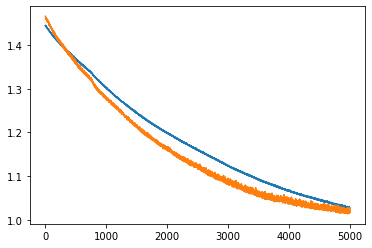

9/9 [==============================] - 0s 2ms/step - loss: 1.1744 - acc: 0.5179
loss= 1.1744264364242554
acc= 0.5178571343421936


In [172]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


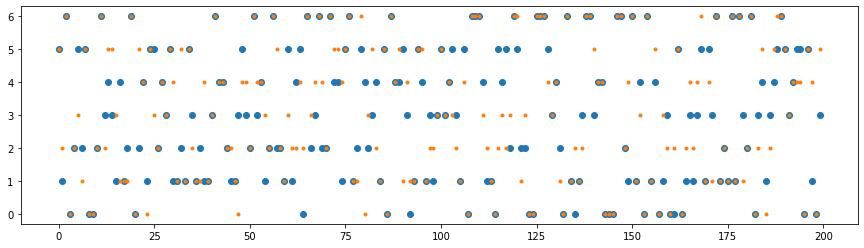

In [173]:
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.figure(figsize=(15,4))
plt.plot(test_y[:200], "o")
plt.plot(predicted[:200], ".")
plt.show()

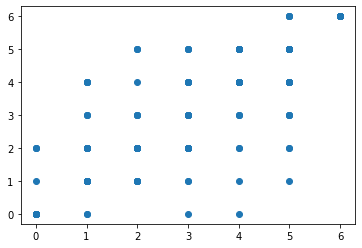

In [174]:
plt.scatter(test_y[:200], predicted[:200])
plt.show()

# 재시도 - 리샘플링해서, 노이즈 추가

카테고리간 비균등이 심하다.

최고 퀄리티(카테고리 인덱스 5, 6)가 적고, 최저 퀄리티(카테고리 인덱스 0, 1)이 적다.

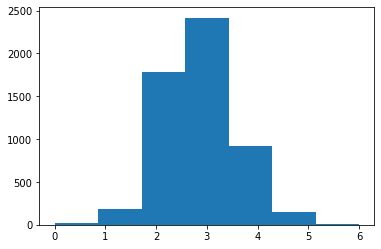

In [ ]:
plt.hist(y, bins=7)
plt.show()

In [ ]:
unique_value, each_value_count = np.unique(y, return_counts=True)
print(each_value_count)

[  26  186 1788 2416  924  152    5]


카테고리별 데이터 갯수 1500가 되도록 다운샘플링, 업샘플링 한다.

업샘플링할 경우 최대 5%의로 노이즈를 추가한다.

In [192]:
PER_CATEGORY_SAMPLE_COUNT = 200

all_resampled_index = []
for i in range(category_count):
  category_index = np.where(y==i)[0]
  sampled_index = np.random.choice(category_index, size=PER_CATEGORY_SAMPLE_COUNT)
  all_resampled_index.extend(sampled_index)

resampled_x = x[all_resampled_index]
resampled_y = y[all_resampled_index]


In [193]:
print(resampled_x.shape)
print(resampled_y.shape)

(1400, 12)
(1400,)


## 노이즈 추가

In [194]:
noise = np.random.normal(0, 1, resampled_x.shape) * 0.05
print(noise.shape)
print(noise.min(), noise.max())

(1400, 12)
-0.1828563269828153 0.20898418280713094


In [195]:
resampled_x = resampled_x * (1.0 + noise)

## train, test 데이터 분리

In [196]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(resampled_x, resampled_y, test_size=0.2, shuffle=True)

## 학습

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [198]:
input_shape = (x.shape[1])
unique_value, each_value_count = np.unique(y, return_counts=True)
category_count = len(each_value_count)

print(input_shape)
print(unique_value)
print(each_value_count)
print(category_count)

12
[0 1 2 3 4 5 6]
[  26  186 1788 2416  924  152    5]
7


In [199]:
model = keras.Sequential()
model.add(Input(input_shape))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(category_count, activation="softmax"))

model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 7)                 77        
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________


In [200]:
history = model.fit(train_x, train_y, epochs=5000, verbose=0, batch_size=128, validation_split=0.1)

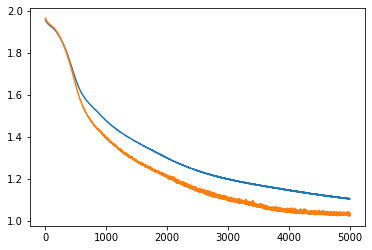

9/9 [==============================] - 0s 2ms/step - loss: 1.2104 - acc: 0.5071
loss= 1.2104291915893555
acc= 0.5071428418159485


In [201]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


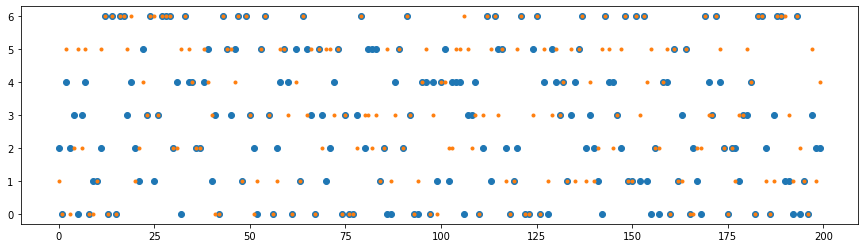

In [202]:
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.figure(figsize=(15,4))
plt.plot(test_y[:200], "o")
plt.plot(predicted[:200], ".")
plt.show()

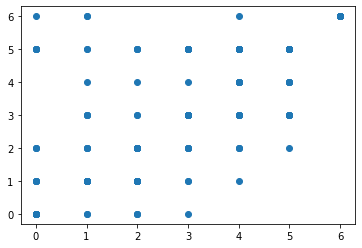

In [203]:
plt.scatter(test_y[:200], predicted[:200])
plt.show()